* Import the fashion MNIST dataset
* Explore the data
* Preprocess the data
* Build the model
  * Setup the layers
  * Compile the model
* Train the model
  * Feed the model
  * Evaluate accuracy
  * Make predictions
  * Verify predictions
* Use the trained the model

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'2.2.0'

In [3]:
# import the fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
             'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
# explore the data
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images.shape

(10000, 28, 28)

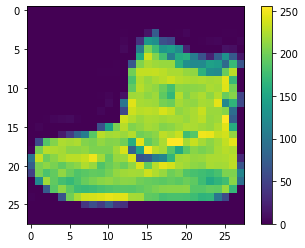

In [8]:
# preprocess the data
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

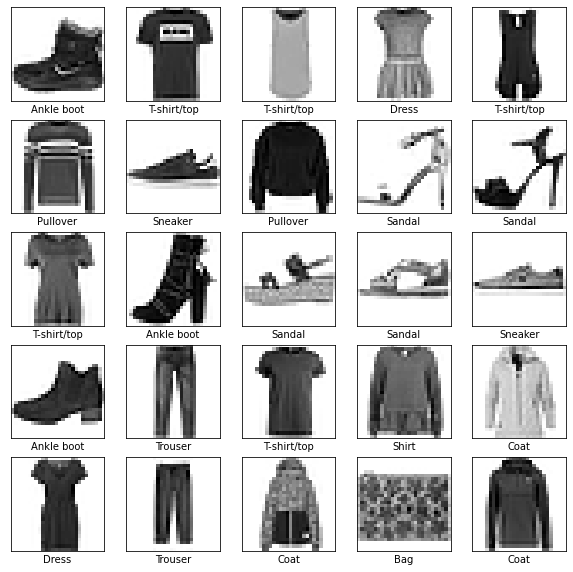

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()
    

In [12]:
# build the model
# setup the layers
model = keras.Sequential([
    # transform the format of the images from two-dim to one-dim
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [13]:
# compile the model
model.compile(optimizer='adam',
             loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [14]:
# train the model
# feed the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 3.3133 - accuracy: 0.7107
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6193 - accuracy: 0.7802
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5615 - accuracy: 0.8018
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5613 - accuracy: 0.8090
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5239 - accuracy: 0.8227
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5049 - accuracy: 0.8274
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5046 - accuracy: 0.8300
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4800 - accuracy: 0.8367
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4739 - accuracy: 0.8389
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.470

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [20]:
784 * 128, 100480 / 128

(100352, 785.0)

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
test_acc

313/313 - 0s - loss: 0.5080 - accuracy: 0.8320


0.8320000171661377

In [23]:
# make predictions
probability_model = keras.Sequential([model,
                                    keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [24]:
predictions.shape

(10000, 10)

In [25]:
predictions[0]

array([6.7688812e-17, 9.5031381e-18, 0.0000000e+00, 1.2389276e-17,
       0.0000000e+00, 8.3354581e-03, 0.0000000e+00, 3.2865420e-02,
       3.8099315e-14, 9.5879906e-01], dtype=float32)

In [26]:
np.argmax(predictions[0])

9

In [36]:
# graph this to look at the full set of 10 class predictions
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],
                                        100 * np.max(predictions_array),
                                        class_names[true_label]),
              color=color)

In [38]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

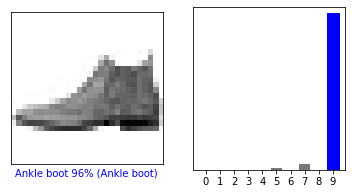

In [39]:
# verify predictions
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

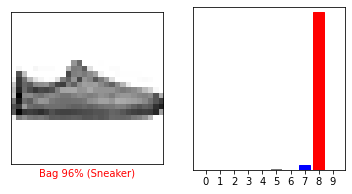

In [40]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

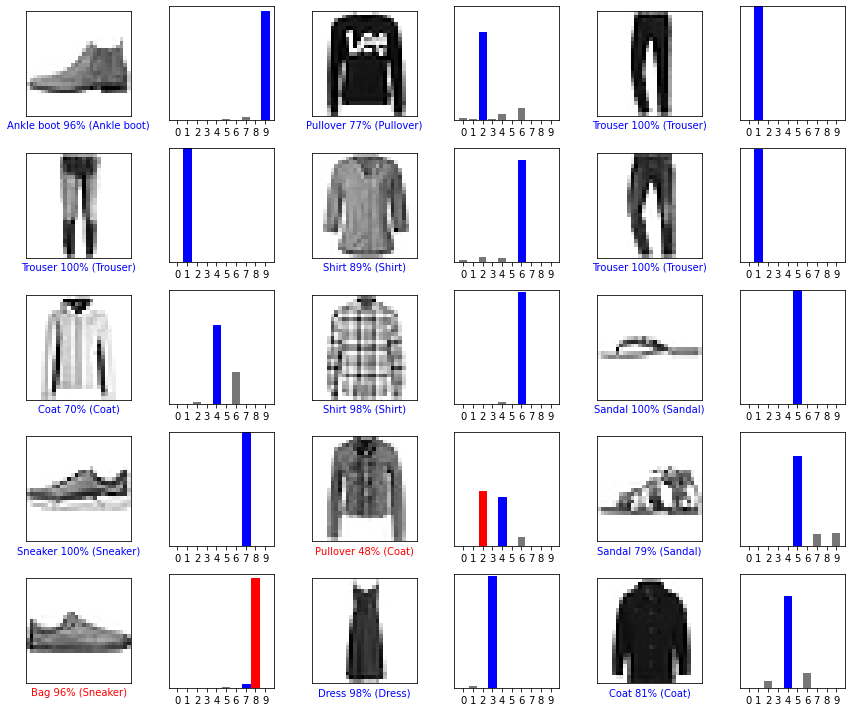

In [41]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [42]:
img = test_images[1]
img.shape

(28, 28)

In [43]:
img = np.expand_dims(img, 0)
img.shape

(1, 28, 28)

In [44]:
predictions_single = probability_model.predict(img)
predictions_single

array([[2.4334509e-02, 1.1032164e-02, 7.7291447e-01, 1.3601576e-02,
        6.0367875e-02, 1.9964400e-06, 1.1026436e-01, 2.3585925e-34,
        7.4829962e-03, 2.8121683e-10]], dtype=float32)

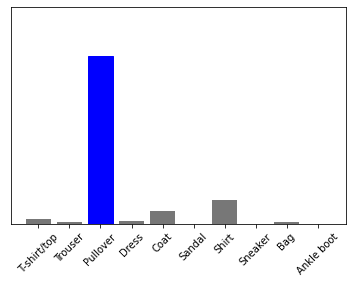

In [45]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [46]:
np.argmax(predictions_single[0])

2